In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np
from datetime import datetime

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]

# Analisa teknikal pasar saham menggunakan python

## Definition

Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume. Unlike fundamental analysts, who attempt to evaluate a security's intrinsic value, technical analysts focus on patterns of price movements, trading signals and various other analytical charting tools to evaluate a security's strength or weakness.

https://www.investopedia.com/terms/t/technicalanalysis.asp

## Technical analysis is based on three main assumptions

###  The market discounts everything.

Many experts criticize technical analysis because it only considers price movements and ignores fundamental factors. Technical analysts believe that everything from a company’s fundamentals to broad market factors to market psychology are already priced into the stock. This removes the need to consider the factors separately before making an investment decision. The only thing remaining is the analysis of price movements, which technical analysts view as the product of supply and demand for a particular stock in the market.

### Price moves in trends.

Technical analysts believe that prices move in short-, medium-, and long-term trend. In other words, a stock price is more likely to continue a past trend than move erratically. Most technical trading strategies are based on this assumption.

### History tends to repeat itself.

Technical analysts believe that history tends to repeat itself. The repetitive nature of price movements is often attributed to market psychology, which tends to be very predictable based on emotions like fear or excitement. Technical analysis uses chart patterns to analyze these emotions and subsequent market movements to understand trends. While many form of technical analysis have been used for more than 100 years, they are still believed to be relevant because they illustrate patterns in price movements that often repeat themselves.

## Some Technical Indicators

- Relative StochStrength Indicator (RSI)
- Stochastic (STOCH)mac
- Moving Average Convergence Divergence (MACD)
- Average WiDirectional Movement (ADX)
- Williams %R (WillR)
- Commodity Channel Index (CCI)
- Averagehig True Range (ATR)
- Ultimate Oscillator (ULTOSC)roc
- Rate of Change (ROC)
- and more . . .

https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/commodity-channel-index-cci/

## Study Case, analisa saham BRI (BBRI)

### Overview data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/faisalburhanudin/idx/master/stocks/BBRI.csv')

# change datatype to date
df['DateTime'] = pd.to_datetime(df['Date'])

# select from first day in this year
df = df[df['DateTime'] >= datetime(2019, 1, 1)]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime
3747,2019-01-01,3660.0,3660.0,3660.0,3660.0,3660.0,0,2019-01-01
3748,2019-01-02,3610.0,3640.0,3590.0,3610.0,3610.0,74945100,2019-01-02
3749,2019-01-03,3580.0,3640.0,3580.0,3620.0,3620.0,93458300,2019-01-03
3750,2019-01-04,3620.0,3660.0,3610.0,3660.0,3660.0,114459600,2019-01-04
3751,2019-01-07,3700.0,3710.0,3660.0,3660.0,3660.0,74641100,2019-01-07


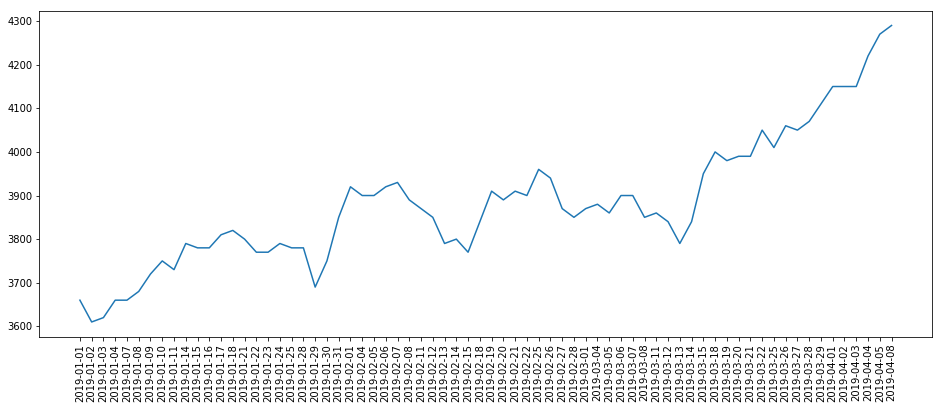

In [4]:
plt.xticks(rotation=90)
plt.plot(df['Date'], df['Close'])
plt.show()

## Simple Moving Average

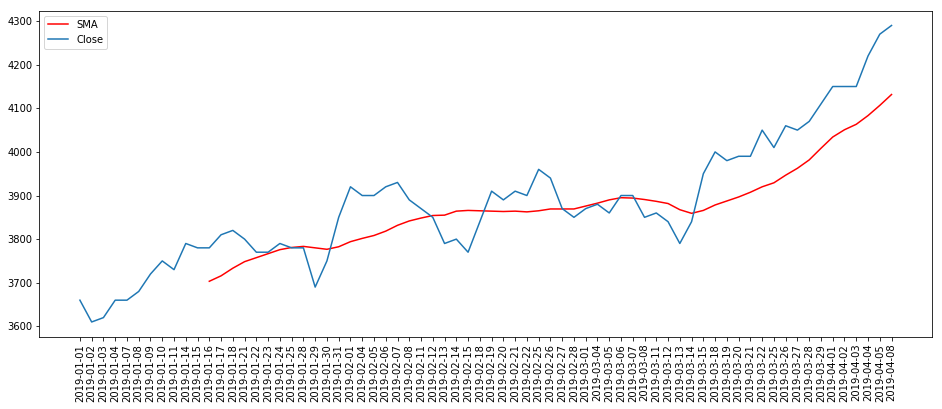

In [5]:
# calculate moving average
ma = talib.SMA(df['Close'].values, timeperiod=12)

# rotate x labels
plt.xticks(rotation=90)

# plot for moving average
plt.plot(df['Date'], ma, label='SMA', color='r')

# plot for closing price
plt.plot(df['Date'], df['Close'], label='Close')

plt.legend(loc='upper left')
plt.show()

## RSI

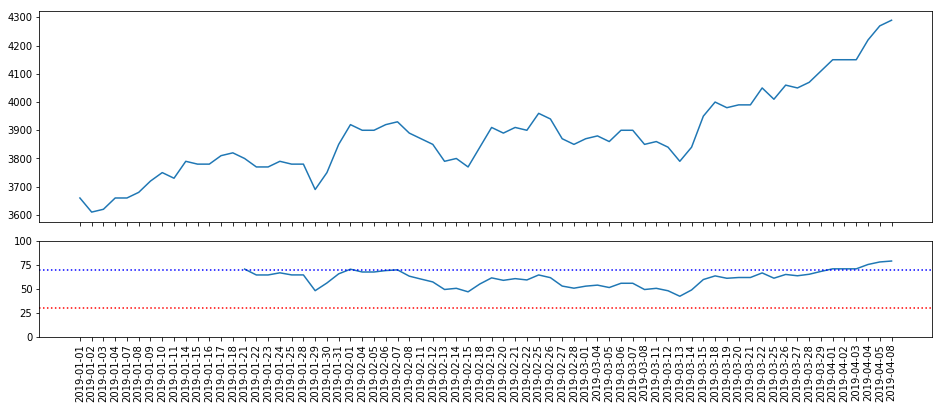

In [6]:
# calculate rsi
output = talib.RSI(df['Close'].values)

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot rsi
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], output)
ax1.set_ylim(0, 100)
ax1.axhline(y=70, color='b', linestyle='dotted')
ax1.axhline(y=30, color='r', linestyle='dotted')

# rotate x label
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## Stoch

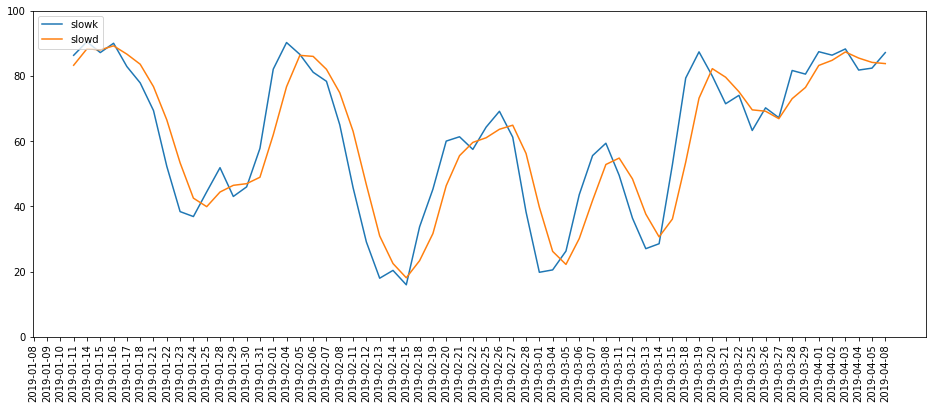

In [7]:
# calculate stoch
slowk, slowd = talib.STOCH(df['High'].values, df['Low'].values, df['Close'].values)

# scale y axis to 0 - 100
plt.ylim(0, 100)

# rotate x label
plt.xticks(rotation=90)

plt.plot(df['Date'], slowk, label='slowk')
plt.plot(df['Date'], slowd, label='slowd')

plt.legend(loc='upper left')
plt.show()

## StochRSI

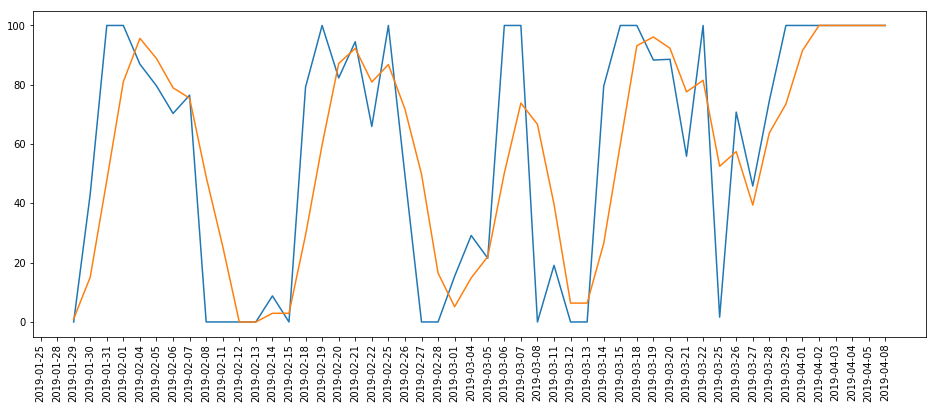

In [8]:
# calculate stoch
fastk, fastd = talib.STOCHRSI(df['Close'].values)

# rotate x label
plt.xticks(rotation=90)

plt.plot(df['Date'], fastk, label='fastk')
plt.plot(df['Date'], fastd, label='fastd')

plt.show()

## MACD

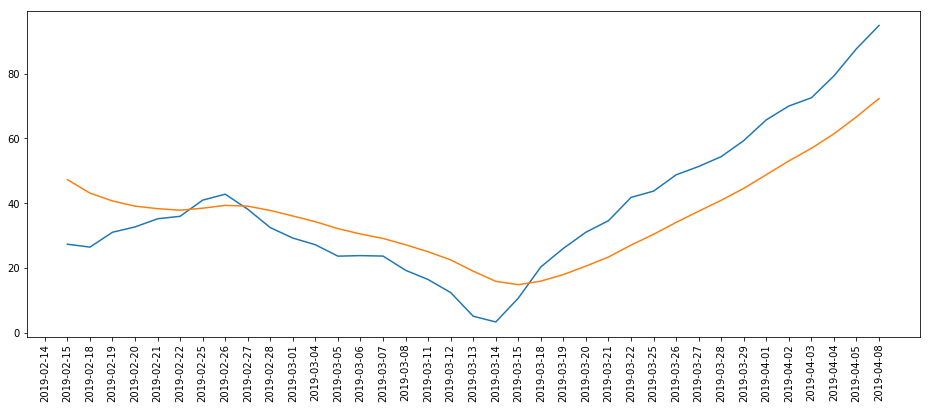

In [19]:
# calculate stoch
macd, macdsignal, macdhist = talib.MACD(df['Close'].values)

# rotate x label
plt.xticks(rotation=90)

plt.plot(df['Date'], macd, label='macd')
plt.plot(df['Date'], macdsignal, label='macdsignal')
plt.show()

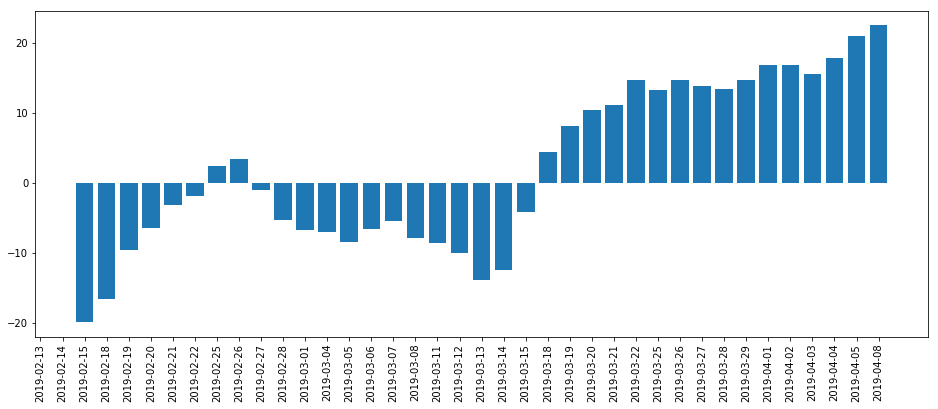

In [22]:
plt.xticks(rotation=90)
plt.bar(df['Date'], macdhist, label='macdhist')
plt.show()

## ADX

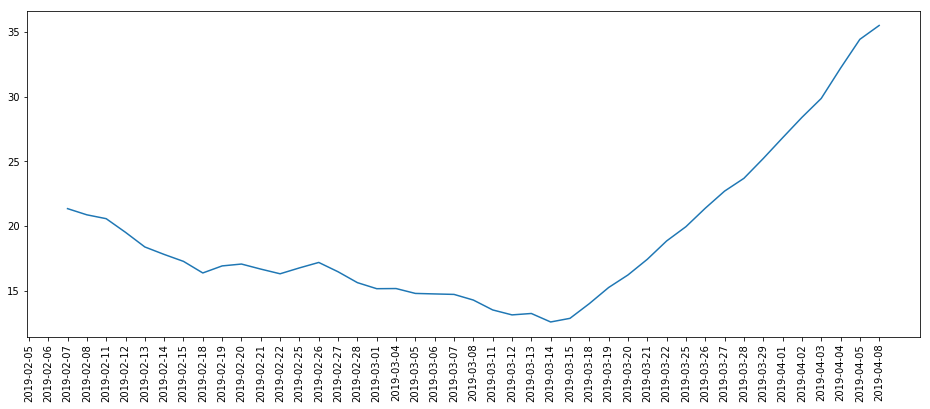

In [26]:
real = talib.ADX(df['High'], df['Low'], df['Close'])

plt.xticks(rotation=90)
plt.plot(df['Date'], real)
plt.show()

## Williams %R

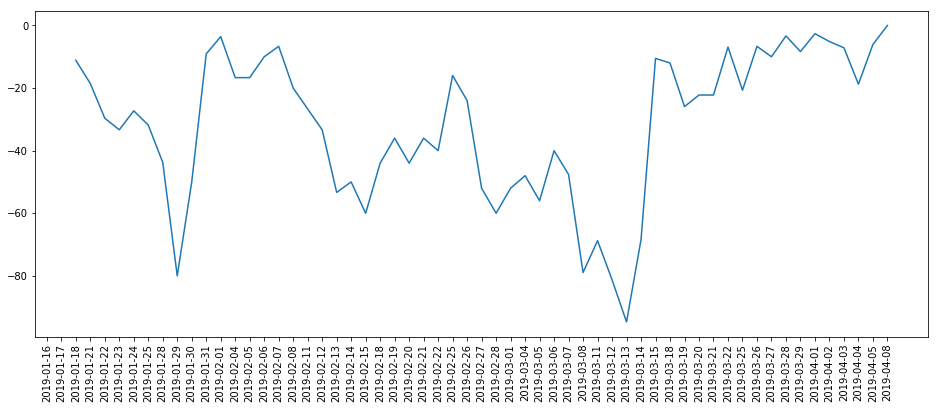

In [27]:
real = talib.WILLR(df['High'], df['Low'], df['Close'])

plt.xticks(rotation=90)
plt.plot(df['Date'], real)
plt.show()

## CCI

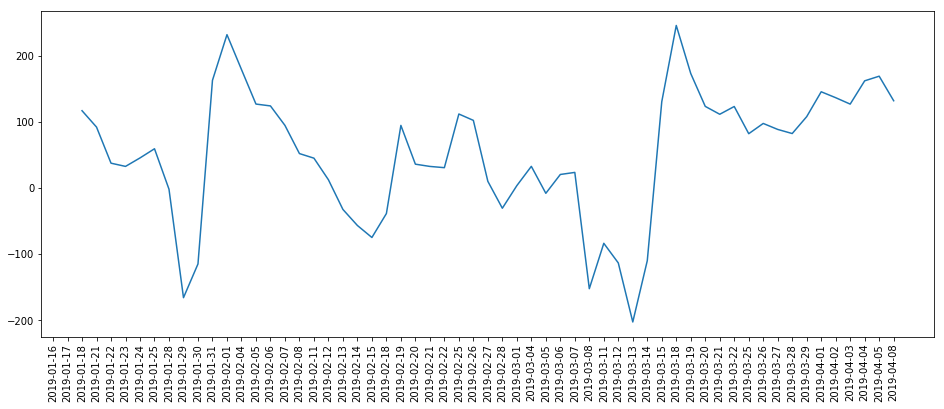

In [28]:
real = talib.CCI(df['High'], df['Low'], df['Close'])

plt.xticks(rotation=90)
plt.plot(df['Date'], real)
plt.show()

## ULTOSC

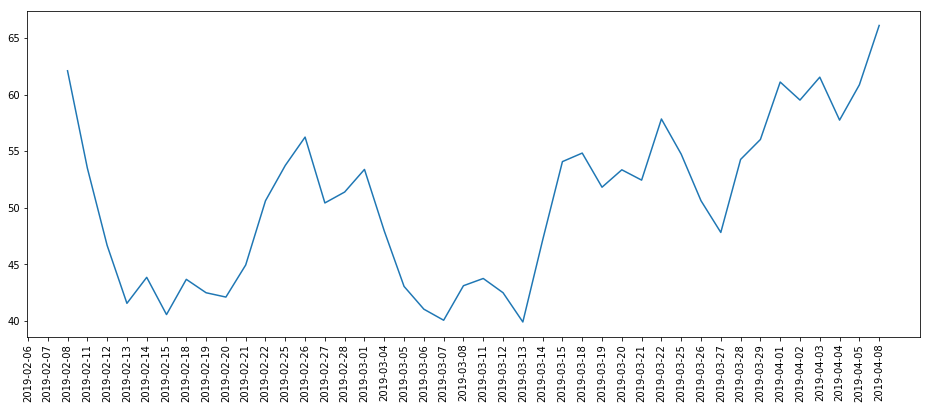

In [29]:
real = talib.ULTOSC(df['High'], df['Low'], df['Close'])

plt.xticks(rotation=90)
plt.plot(df['Date'], real)
plt.show()

## ROC

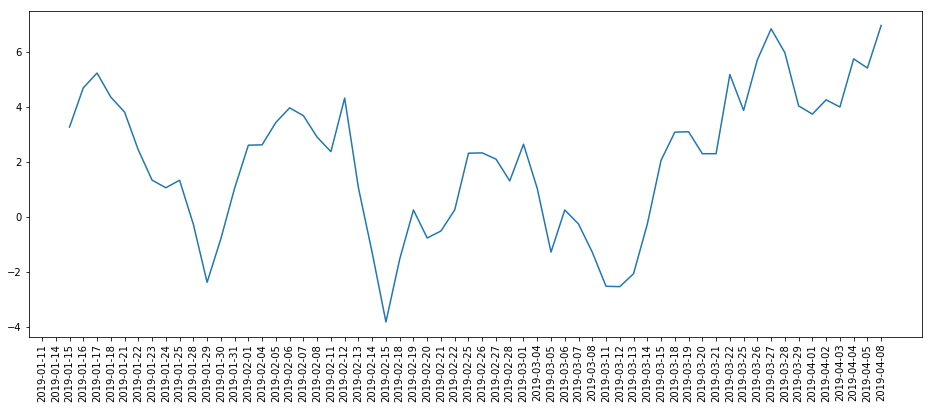

In [31]:
real = talib.ROC(df['Close'])

plt.xticks(rotation=90)
plt.plot(df['Date'], real)
plt.show()